In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datainfo=pd.read_csv("lending_club_info.csv",index_col='LoanStatNew')

In [3]:
datainfo

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
df=pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.shape

(396030, 27)

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.loan_status.value_counts()
#hence classsification problem

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
#lets check these columns one by one
df.title
df.title.value_counts()
#since it has about 50k different values(which is about 13%) we will consider it as a categorial feature 
#so title is important feature for our prediction\

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [10]:
df.emp_title.value_counts()
#so its difficult to decide whether emp_title should be taken as categorical feature or not
#since it has more than 170k different values(which is about 50%) we wont consider it as a feature 

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [11]:
df.emp_length.value_counts()
#this is a good categorical feature, we can also consider it as a continuous feature
#but lets consider it as categorical for now

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [12]:
df.revol_util.value_counts()
#this is a continuos feature
#we can make it categorical using binning to more generalise the model

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [13]:
df.mort_acc
#its value ranges from 0 to 34, its a good continous feature

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [14]:
df.pub_rec_bankruptcies.value_counts()
#its a good continous feature

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
#revol_util and pub_rec_bankruptcies has very few rows missing. we have options-
#1.so we should drop all rows where these two are nulls
#2.we can fill pub_rec_bankruptcies missing values with 0, because most of the values there are 0
#3.we can fill revol_util with mean or something which going to be quite difficult to figure out

#so heres my take
#lets fill null values in pub_rec_bankruptcies with 0

In [16]:
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(0)

In [17]:
#lets check for null values in pub_rec_bankruptcies
df.pub_rec_bankruptcies.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Name: pub_rec_bankruptcies, Length: 396030, dtype: bool

<AxesSubplot:xlabel='revol_util'>

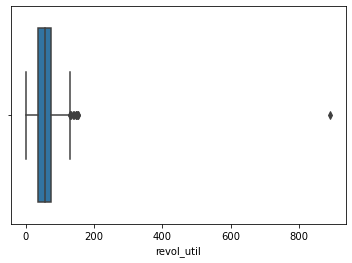

In [18]:
#lets make a boxplot of revol_util to see what we should fill in that column
sns.boxplot(x=df.revol_util)

In [19]:
#lets fill null values in revol_util with median
median=df.revol_util.median()
df.revol_util=df.revol_util.fillna(median)

In [20]:
df.revol_util.isnull().sum()

0

In [21]:
#sns.barplot(y=df.title.value_counts())
#titleseries=df.title.value_counts()
#print(len(titleseries))
#titledf=pd.DataFrame({'title':titleseries.index, 'count':titleseries.values})
#sns.barplot(x='title',y='count',data=titledf)

In [22]:
#major value is Debt consolidation in title column, so lets fill it with this
df.title=df.title.fillna('Debt consolidation')

In [23]:
df.title.isnull().sum()

0

In [24]:
#for emp_title we can either drop the column, or create a new variable out of it
df.drop(columns=['emp_title'],axis=1,inplace=True)

In [25]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [26]:
#lets convert emp length to an ordinal column rather than categorical
#we have o make custom encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#df.emp_length = encoder.fit_transform(df.emp_length)
#df.emp_length.value_counts()
def customencoder(emplength):
    if(emplength==None):
        return emplength
    emplength=str(emplength)
    if("10+" in emplength):
        return 10.0
    elif("<" in emplength):
        return 0.0
    elif("1" in emplength):
        return 1.0
    elif("2" in emplength):
        return 2.0
    elif("3" in emplength):
        return 3.0
    elif("4" in emplength):
        return 4.0
    elif("5" in emplength):
        return 5.0
    elif("6" in emplength):
        return 6.0
    elif("7" in emplength):
        return 7.0
    elif("8" in emplength):
        return 8.0
    elif("9" in emplength):
        return 9.0
df.emp_length=df.emp_length.apply(customencoder)

In [27]:
df.emp_length.value_counts()

10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: emp_length, dtype: int64

In [28]:
#now fill null values with median
df.emp_length=df.emp_length.fillna(df.emp_length.median())
df.emp_length.isnull().sum()

0

In [29]:
df.mort_acc.value_counts()
#so we have two choices for mort_acc
#either draw boxplot and look for outliers and take decision, or fill it with 0 i.e. major value

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='mort_acc'>

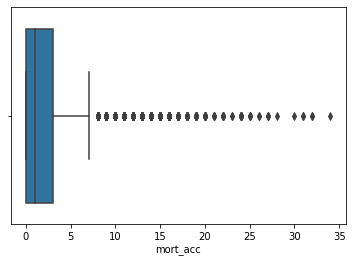

In [30]:
sns.boxplot(x=df.mort_acc)
#so there is lot of outliers, we can fill nulls with median

In [31]:
df.mort_acc=df.mort_acc.fillna(df.mort_acc.median())

In [32]:
df.mort_acc.isnull().sum()

0

In [33]:
#so dealing with null values done
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [34]:
#lets apply label encoder to all columns and remove useless columns
df.address

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [35]:
#here pincode can be useless, lets extract this
#remove white spaces
df.address=df.address.str.strip()
df['pincode']=df.address.str.slice(start=-1,stop=-6,step=-1)
df.pincode

0         09622
1         31150
2         31150
3         31800
4         05611
          ...  
396025    32703
396026    31150
396027    66407
396028    79592
396029    25084
Name: pincode, Length: 396030, dtype: object

In [36]:
#now reverse the pincode
df.pincode=df.pincode.str[::-1]
df.pincode

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: pincode, Length: 396030, dtype: object

In [37]:
#now lets check about this pincode column
df.pincode.value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: pincode, dtype: int64

In [38]:
#soo its a good castegorical column, lets apply label encoder to it now, and drop address column
df.drop(columns=['address'],inplace=True)

In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.pincode=encoder.fit_transform(df.pincode)

In [41]:
df.pincode.value_counts()

7    56985
5    56546
3    56527
6    55917
0    45824
4    45471
1    45402
2    11226
9    11151
8    10981
Name: pincode, dtype: int64

In [42]:
df.pub_rec_bankruptcies.value_counts()
#this column is fine

0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.application_type=encoder.fit_transform(df.application_type)

In [44]:
df.application_type.value_counts()

1    395319
2       425
0       286
Name: application_type, dtype: int64

In [45]:
df.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.initial_list_status=encoder.fit_transform(df.initial_list_status)

In [47]:
df.initial_list_status.value_counts()

0    238066
1    157964
Name: initial_list_status, dtype: int64

In [48]:
df.total_acc.value_counts()
#this column already fine

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: total_acc, Length: 118, dtype: int64

In [49]:
df.revol_bal
#this column already fine

0         36369.0
1         20131.0
2         11987.0
3          5472.0
4         24584.0
           ...   
396025     1990.0
396026    43263.0
396027    32704.0
396028    15704.0
396029     4292.0
Name: revol_bal, Length: 396030, dtype: float64

In [50]:
df.pub_rec.value_counts()
#this column also fine

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [51]:
df.open_acc.value_counts()
#this column is fine

9.0     36779
10.0    35441
8.0     35137
11.0    32695
7.0     31328
        ...  
55.0        2
76.0        2
58.0        1
57.0        1
90.0        1
Name: open_acc, Length: 61, dtype: int64

In [52]:
df.earliest_cr_line.value_counts()
#this data is useful
#we need to convert this into numerical values
#we can subtract number of months or year, from current date to make a numerical value out of it
df.earliest_cr_line=pd.to_datetime(df.earliest_cr_line)

In [53]:
def convertToDifferenceInYears(data):
    return 2022-data.year
df.earliest_cr_line=df.earliest_cr_line.apply(convertToDifferenceInYears)

In [54]:
df.earliest_cr_line

0         32
1         18
2         15
3         16
4         23
          ..
396025    18
396026    16
396027    25
396028    32
396029    24
Name: earliest_cr_line, Length: 396030, dtype: int64

In [55]:
df.dti

0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
396025    15.63
396026    21.45
396027    17.56
396028    15.88
396029     8.32
Name: dti, Length: 396030, dtype: float64

In [56]:
df.title
#convert these to categorical

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.title=encoder.fit_transform(df.title)

In [58]:
df.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.purpose=encoder.fit_transform(df.purpose)

In [60]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.loan_status=encoder.fit_transform(df.loan_status)

In [62]:
df.loan_status.value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [63]:
df.issue_d.value_counts()
#there should be some trend based on month


Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [64]:
df.issue_d=pd.to_datetime(df.issue_d)

In [65]:
df['issue_month']=df.issue_d.apply(lambda x:x.month)

<AxesSubplot:>

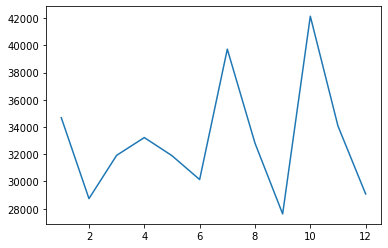

In [66]:
df.issue_month.value_counts().sort_index(ascending=True).plot()

In [67]:
df['issue_year']=df.issue_d.apply(lambda x:x.year)

<AxesSubplot:>

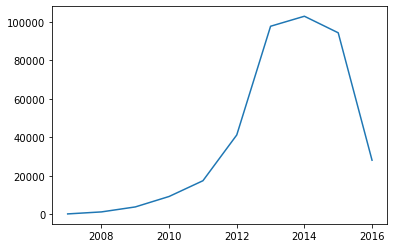

In [68]:
df.issue_year.value_counts().sort_index(ascending=True).plot()

In [69]:
df.drop(columns=['issue_d'],inplace=True)

In [70]:
df.verification_status.value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.verification_status=encoder.fit_transform(df.verification_status)

In [72]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.home_ownership=encoder.fit_transform(df.home_ownership)

In [74]:
df.home_ownership.value_counts()

1    198348
5    159790
4     37746
3       112
2        31
0         3
Name: home_ownership, dtype: int64

In [75]:
df.sub_grade.value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.sub_grade=encoder.fit_transform(df.sub_grade)

In [77]:
df.grade.value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.grade=encoder.fit_transform(df.grade)

In [79]:
df.term=pd.to_numeric(df.term.str[0:3])

In [80]:
df.term.value_counts()

36    302005
60     94025
Name: term, dtype: int64

In [81]:
df.loan_amnt

0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 396030, dtype: float64

In [82]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_month,issue_year
0,10000.0,36,11.44,329.48,1,8,10.0,5,117000.0,0,...,36369.0,41.8,25.0,1,1,0.0,0.0,3,1,2015
1,8000.0,36,11.99,265.68,1,9,4.0,1,65000.0,0,...,20131.0,53.3,27.0,0,1,3.0,0.0,1,1,2015
2,15600.0,36,10.49,506.97,1,7,0.0,5,43057.0,1,...,11987.0,92.2,26.0,0,1,0.0,0.0,1,1,2015
3,7200.0,36,6.49,220.65,0,1,6.0,5,54000.0,0,...,5472.0,21.5,13.0,0,1,0.0,0.0,0,11,2014
4,24375.0,60,17.27,609.33,2,14,9.0,1,55000.0,2,...,24584.0,69.8,43.0,0,1,1.0,0.0,2,4,2013


In [83]:
from sklearn.model_selection import train_test_split
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'issue_month', 'issue_year'],
      dtype='object')

In [84]:
X=df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status','purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'pincode', 'issue_month', 'issue_year']]
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [85]:
X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,pincode,issue_month,issue_year
182133,12550.0,36,18.24,455.23,3,19,10.0,4,35000.0,1,...,11184.0,88.8,19.0,1,1,0.0,1.0,0,10,2014
108458,10425.0,36,22.45,400.57,4,24,6.0,5,52000.0,1,...,4841.0,52.6,6.0,1,1,0.0,0.0,5,5,2014
199516,28000.0,36,12.35,934.69,1,8,8.0,5,120000.0,2,...,16381.0,54.8,21.0,0,1,0.0,0.0,7,8,2013
235632,10000.0,36,10.37,324.42,1,7,0.0,1,75000.0,1,...,26739.0,87.7,34.0,0,1,1.0,0.0,2,3,2011
46507,20000.0,60,14.31,468.59,2,13,10.0,1,123500.0,1,...,14896.0,49.2,45.0,0,1,8.0,0.0,4,12,2014


<AxesSubplot:>

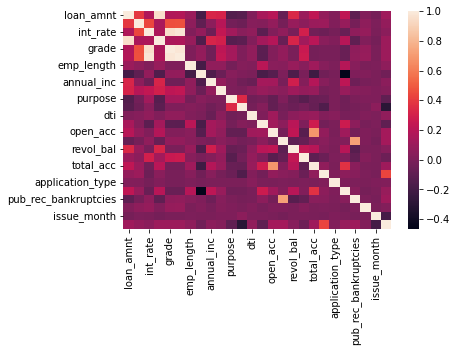

In [86]:
sns.heatmap(X_train.corr())

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))

In [88]:
X_test=pd.DataFrame(scaler.transform(X_test))

In [89]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.187358,-0.558389,1.028470,0.093494,0.883964,1.199735,1.139468,0.572169,-0.613904,-0.045591,...,-0.229936,1.434431,-0.539628,1.228513,-0.009438,-0.844320,2.463130,-1.639149,1.006829,0.251243
1,-0.441762,-0.558389,1.970138,-0.124652,1.634205,1.957605,0.016440,1.091869,-0.347718,-0.045591,...,-0.542957,-0.047964,-1.633005,1.228513,-0.009438,-0.844320,-0.340651,0.359551,-0.452144,0.251243
2,1.662308,-0.558389,-0.288971,2.007002,-0.616519,-0.467580,0.577954,1.091869,0.717028,1.179686,...,0.026530,0.042126,-0.371416,-0.813992,-0.009438,-0.844320,-0.340651,1.159031,0.423240,-0.422977
3,-0.492642,-0.558389,-0.731846,-0.428564,-0.616519,-0.619155,-1.668103,-0.986930,0.012417,-0.045591,...,0.537686,1.389386,0.721961,-0.813992,-0.009438,-0.357953,-0.340651,-0.839669,-1.035733,-1.771417
4,0.704552,1.790867,0.149430,0.146814,0.133722,0.290290,1.139468,-0.986930,0.771831,-0.045591,...,-0.046753,-0.187195,1.647126,-0.813992,-0.009438,3.046617,-0.340651,-0.040189,1.590418,0.251243


In [90]:
#pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)Note: you may need to restart the kernel to use updated packages.

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_a

In [92]:
X_train.shape

(265340, 26)

In [135]:
#scaling done, now model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.activations as activation
import tensorflow.keras as k

In [142]:
def unit_step_function(i):
    return k.backend.switch(i>=0.5,lambda x:1,lambda x:0)

In [145]:
model=Sequential()
model.add(Dense(26,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(13,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
#model.add(Dense(1,activation=unit_step_function))

model.compile(optimizer='adam',loss='mse')

In [146]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=400)

Epoch 1/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.1275 - val_loss: 0.1121
Epoch 2/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1096 - val_loss: 0.1084
Epoch 3/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1080 - val_loss: 0.1074
Epoch 4/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1074 - val_loss: 0.1072
Epoch 5/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1069 - val_loss: 0.1066
Epoch 6/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1061 - val_loss: 0.1048
Epoch 7/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.1009 - val_loss: 0.0901
Epoch 8/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0847 - val_loss: 0.0823
Epoch 9/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0822 - val_loss: 0.0818
Epoch 10/400
1037/1037 [==============================] - 2s 2ms/step - l

Epoch 80/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0804
Epoch 81/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0804
Epoch 82/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0803
Epoch 83/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0805
Epoch 84/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0804
Epoch 85/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0803
Epoch 86/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0804
Epoch 87/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0796 - val_loss: 0.0802
Epoch 88/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0795 - val_loss: 0.0805
Epoch 89/400
1037/1037 [==============================] - 2s 2ms

1037/1037 [==============================] - 2s 2ms/step - loss: 0.0791 - val_loss: 0.0805
Epoch 159/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0791 - val_loss: 0.0809
Epoch 160/400
1037/1037 [==============================] - 2s 2ms/step - loss: 0.0792 - val_loss: 0.0810
Epoch 161/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0791 - val_loss: 0.0810
Epoch 162/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0791 - val_loss: 0.0813
Epoch 163/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0792 - val_loss: 0.0809
Epoch 164/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0791 - val_loss: 0.0811
Epoch 165/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0792 - val_loss: 0.0808
Epoch 166/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0791 - val_loss: 0.0808
Epoch 167/400
1037/1037 [==============================] - 3s 2ms/ste

1037/1037 [==============================] - 3s 2ms/step - loss: 0.0788 - val_loss: 0.0815
Epoch 237/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0789 - val_loss: 0.0809
Epoch 238/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0790 - val_loss: 0.0810
Epoch 239/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0788 - val_loss: 0.0809
Epoch 240/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0788 - val_loss: 0.0808
Epoch 241/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0790 - val_loss: 0.0809
Epoch 242/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0789 - val_loss: 0.0807
Epoch 243/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0788 - val_loss: 0.0810
Epoch 244/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0789 - val_loss: 0.0810
Epoch 245/400
1037/1037 [==============================] - 3s 3ms/ste

1037/1037 [==============================] - 3s 3ms/step - loss: 0.0786 - val_loss: 0.0810
Epoch 315/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0810
Epoch 316/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0786 - val_loss: 0.0813
Epoch 317/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0811
Epoch 318/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0811
Epoch 319/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0786 - val_loss: 0.0810
Epoch 320/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0812
Epoch 321/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0810
Epoch 322/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0787 - val_loss: 0.0811
Epoch 323/400
1037/1037 [==============================] - 3s 3ms/ste

1037/1037 [==============================] - 3s 2ms/step - loss: 0.0784 - val_loss: 0.0813
Epoch 393/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0784 - val_loss: 0.0818
Epoch 394/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0785 - val_loss: 0.0818
Epoch 395/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0784 - val_loss: 0.0812
Epoch 396/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0784 - val_loss: 0.0816
Epoch 397/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0785 - val_loss: 0.0815
Epoch 398/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0784 - val_loss: 0.0815
Epoch 399/400
1037/1037 [==============================] - 3s 3ms/step - loss: 0.0785 - val_loss: 0.0818
Epoch 400/400
1037/1037 [==============================] - 3s 2ms/step - loss: 0.0786 - val_loss: 0.0816


In [147]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

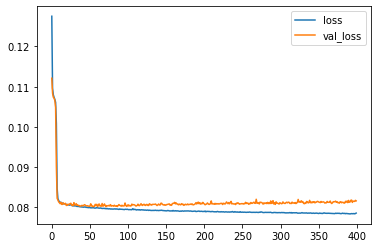

In [148]:
losses.plot()

In [149]:
predictions=model.predict(X_test)
predictions

4085/4085 [==============================] - 4s 867us/step


array([[1.        ],
       [0.77552605],
       [1.        ],
       ...,
       [0.8225205 ],
       [0.86890507],
       [0.9999998 ]], dtype=float32)

In [153]:
predictions=np.apply_along_axis(lambda x: 1 if x>=0.5 else 0,1,predictions)

In [154]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions)

0.34536549327770383

In [157]:
#this is a bad variance score we need make it atleast 0.8
#this is a wrong metric to evaluate classification algo, hence use classification report
from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.49      0.63     25613
           1       0.89      0.99      0.93    105077

    accuracy                           0.89    130690
   macro avg       0.89      0.74      0.78    130690
weighted avg       0.89      0.89      0.88    130690



In [ ]:
#by looking in the graph, overfitting occurs, we need to fix it